In [103]:
import numpy as np
import pandas as pd
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline

In [104]:
arquivo = open('model_json.json', 'r')
struct = arquivo.read()
arquivo.close()

In [105]:
model = model_from_json(struct)
model.load_weights('model_simpsons.h5')
result = []

In [113]:
personagens = pd.read_csv('number_pic_char.csv', index_col = 0)
personagens.sort_values(by=['name'], inplace=True)
personagens.drop(['total', 'train', 'test', 'bounding_box',], axis = 1, inplace=True)
personagens.reset_index(drop = True, inplace=True)
personagens.drop([1, 5, 9, 11, 13, 14,
                  16, 17, 19, 20, 24,
                  31, 35, 39, 43, 44,
                  45], inplace=True)
personagens.reset_index(drop = True, inplace=True)
personagens.head()

,name
0,Abraham Grampa Simpson
1,Apu Nahasapeemapetilon
2,Barney Gumble
3,Bart Simpson
4,Carl Carlson


In [118]:
imagem = 'simpsons_dataset/charles_montgomery_burns/pic_0000.jpg'

In [119]:
result = []

test_image = image.load_img(imagem, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

pred = model.predict_on_batch(test_image)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
imprime

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.1696316e-19, 0.0000000e+00], dtype=float32)

O personagem reconhecido foi Charles Montgomery Burns


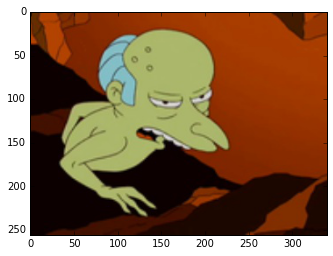

In [120]:
result_final  = imprime.argmax()
imagem = 'simpsons_dataset/charles_montgomery_burns/pic_0000.jpg'
imagem = mpimg.imread(imagem)
plt.imshow(imagem)
print('O personagem reconhecido foi '+personagens.loc[result_final][0])